# Autoencoder Para Mejorar Una Imagen.

 **El autoencoder tiene diferentes aplicaciones algunas son:**

*   Eliminación de ruido
*   Anonimización de datos

*   Criptografía y seguridad
*   Agrupamiento semántico

*   Generación de nuevos datos
*   Imputación de datos perdidos

*   Reducción de dimensionalidad
*   Identificación de anomalías


**El autoencoder tiene diferentes aplicaciones una de ellas es a la identificación de anomalías o  datos atípicos o  en ingles (outliers) es una observación que es numéricamente distante del resto de los datos.**

In [ ]:
%%html
<p style='text-align: justify;'> <b>El autoencoder tiene diferentes aplicaciones una de ellas es a la reducción de dimensionalidad. Ejemplo: en reducción de ruido de una imagen, primero la imagen de entrada, luego un codificador, se comprime la imagen y un decodificador. Al comprimir la imagen se tiene una reducción de dimensionalidad se queda con lo más representativo de la imagen</b> </p>

In [ ]:
%%html
<p style='text-align: justify;'> <b>Una aplicación del autoencoder es la reducción de ruido en una imagen, se debe tener un dato de entrada, luego un codificador, se comprime la imagen y un decodificador para que la imagen este sin ruido. En este caso el dato de entrada es una imagen con ruido y el dato de salida es la misma imagen sin ruido(ver imagen a continuación) </b> </p>


In [ ]:
%%html
<p style='text-align: justify;'> <b> El autoencoder lo podemos programar utilizando keras y tensorflow, importando la librería, las capas son layers, la capa de entrada tiene 784 neuronas(Cada imagen tiene 28 x 28 píxeles cuadrados 784 píxeles en total por cada imágen), después se comprime a 32 y luego descomprensión a 784. Utilizamos funciones de activación relu para la compresión y sigmoide para la descompresión. Se utiliza el codificador y decodificador en la imagen se muestra como se usa. layers[-1] significa la última capa, la de salida </b> </p>


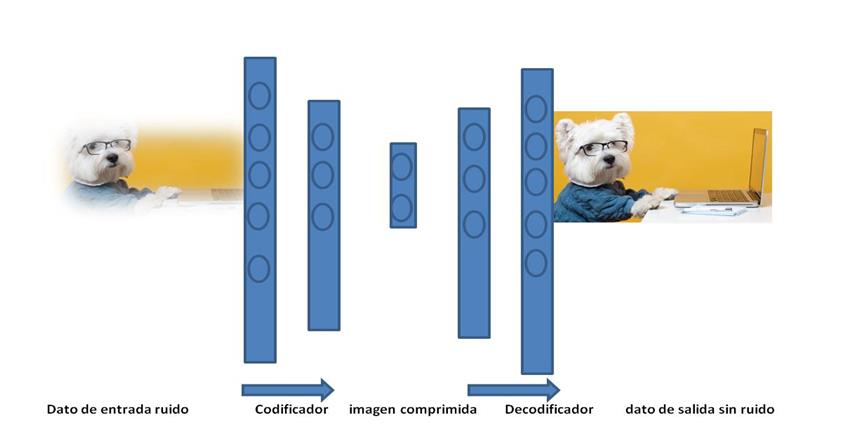

# Entrenar el modelo con keras y tensorflow

1. **Cargue las librerias que necesite:numpy, matplotlib.pyplot,etc.**


2. **Para cargar las librerias utilice  import seguido del nombre de la libreria y de un alias (as).Ejemplo import pandas as pd**


3.   **Ejecute de forma secuencial de arriba hacia abajo las celdas de código dando click al boton play o ctrl+enter**
   
4. **Al ejecutar la celda debe marcar un check en color verde al lado izquierdo de la celda de código y en el menu de google colab en la parte superior derecha, se debe activar Ram y Disco con un check verde.**


5. **El simbolo # es para comentarios dentro del código.**

6. **Para subir un archivo a google colab se puede hacer click en la parte izquierda, donde aparace una carpeta y le da click al simbolo de una hoja con la flecha hacia arriba cargar archivo al almacenamiento de sesión.**

Mnist un conjunto que esta dentro de keras.

Conjunto de números escritos a mano digitalizados.

Los números son:0,1,2,3,4,5,6,7,8,9

En total son 10 números.

Estos números estan en un dataset en keras.

Cada imagen tiene 28 x 28 píxeles cuadrados (784 píxeles en total por cada imágen). Se utiliza una división  del conjunto de datos para evaluar y comparar modelos, en la que se utilizan 60.000 imágenes para formar un modelo(training) y un conjunto separado de 10.000 imágenes para probarlo(test)

**Para guardar el modelo se instala la libreria h5py**

In [ ]:
pip install h5py

**Observemos las imágenes de los numeros en escala de grises**


1.   x_train:entrada de la red neuronal(entrenar la red)
2.   y_train:salida de la red neuronal(entrenar la red)
3. x_test:entrada de prueba del red neuronal(probrando la red neuronal)
4. y_test:salida de prueba de la red neuronal(probrando la red neuronal)
5. mnist.load_data():Carga los números



Para graficar los números.

* Se puede escribir subplot(224) ó subplot(2,2,4)
* Especifica num_filas, num_columnas, numplot



11490434/11490434 [==============================] - 0s 0us/step


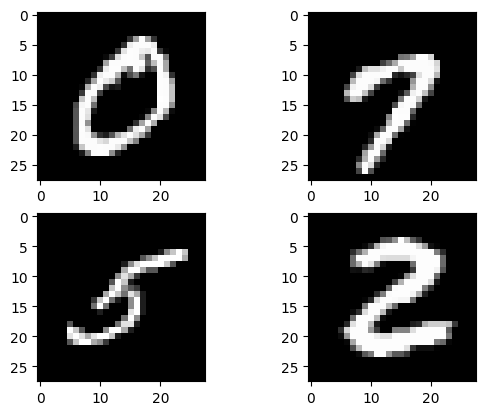

In [ ]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
# cargar (descargar si es necesario) el conjunto de datos MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# plot 4 imagenes en escala de grises
plt.subplot(2,2,1)
plt.imshow(x_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(2,2,2)
plt.imshow(x_train[15], cmap=plt.get_cmap('gray'))
plt.subplot(2,2,3)
plt.imshow(x_train[35], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(x_train[25], cmap=plt.get_cmap('gray'))
# Muestra el gráfico de los 4 numeros
plt.show()

**Cargamos las capas del autoencoder**

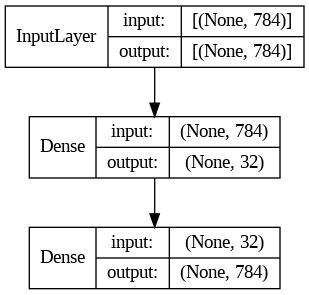

In [ ]:
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.utils import plot_model


entrada = keras.Input(shape=(784,))
codificación = layers.Dense(32, activation='relu')(entrada)
salida = layers.Dense(784, activation='sigmoid')(codificación)

autoencoder = keras.Model(entrada, salida)

codificador = keras.Model(entrada, codificación)
entradacodifi = keras.Input(shape=(32,))
capadescodifi = autoencoder.layers[-1]
descodifi = keras.Model(entradacodifi, capadescodifi(entradacodifi))

keras.utils.plot_model(autoencoder, show_shapes=True, show_layer_names=False)



**Miremos las capas del modelo de red neuronal densa artificial autoencoder**

In [ ]:
print(autoencoder.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 784)               25872     
                                                                 
Total params: 50992 (199.19 KB)
Trainable params: 50992 (199.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


**Compilamos el modelo mediante model.compile() y colocando el algoritmo de optimización y la función de pérdida**

In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
%%html
<p style='text-align: justify;'> <b> Cargamos el conjunto de datos MNIST, una parte para  training y la otra para test y normalizamos dividiendo por 255 pixeles(los valores de los pixeles estan entre 0 y 255) asi quedan los valores en el intervalo [0,1]. Se elimina la etiqueta,descartándola al leer el conjunto de datos</b> </p>


In [ ]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
%%html
<p style='text-align: justify;'> <b>Procedemos a entrenar el autoencoder usando el dataset de  MNIST,con las imagenes de los numeros del 0 al 9 digitalizados, estableciendo como datos de salida, con los que hay que comparar, los mismos datos de entrada (para mirar algun cambio cuando se otro tipo de dato,conocer muy bien el dato inicial), y fijando el número de epochs, tamaño de lote(batch_size). </b> </p>


**Por eso apararece x_train, dos veces, entrada el dato , salida el mismo dato**

In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,validation_data=(x_test, x_test))


Epoch 1/10
235/235 [==============================] - 4s 14ms/step - loss: 0.2776 - val_loss: 0.1916
Epoch 2/10
235/235 [==============================] - 4s 18ms/step - loss: 0.1712 - val_loss: 0.1541
Epoch 3/10
235/235 [==============================] - 6s 26ms/step - loss: 0.1448 - val_loss: 0.1344
Epoch 4/10
235/235 [==============================] - 6s 25ms/step - loss: 0.1288 - val_loss: 0.1217
Epoch 5/10
235/235 [==============================] - 6s 27ms/step - loss: 0.1186 - val_loss: 0.1135
Epoch 6/10
235/235 [==============================] - 6s 25ms/step - loss: 0.1116 - val_loss: 0.1078
Epoch 7/10
235/235 [==============================] - 6s 23ms/step - loss: 0.1064 - val_loss: 0.1031
Epoch 8/10
235/235 [==============================] - 6s 25ms/step - loss: 0.1025 - val_loss: 0.0997
Epoch 9/10
235/235 [==============================] - 5s 19ms/step - loss: 0.0996 - val_loss: 0.0973
Epoch 10/10
235/235 [==============================] - 3s 14ms/step - loss: 0.0977 - val_lo

**Miremos las capas del modelo de la red neuronal densa artificial autoencoder**

In [ ]:
print(autoencoder.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 784)               25872     
                                                                 
Total params: 50992 (199.19 KB)
Trainable params: 50992 (199.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
%%html
<p style='text-align: justify;'> <b> Tomamos  4 imagenes de los números (0,1,2,3,4,5,6,7,8,9)escrito a mano digitalizados  de MNIST, los pasamos por el codificador y luego por el descodificador, quedándonos tanto con la imagen original, la reconstrucción y también la codificación interna de 32 bytes para representarlos gráficamente y poder compararlos.</b> </p>


313/313 [==============================] - 1s 2ms/step


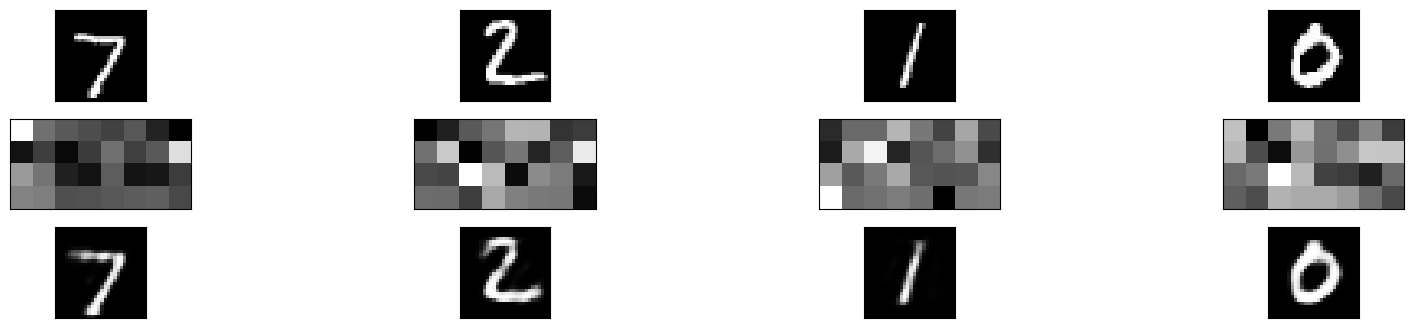

In [ ]:
encoded_imgs = codificador.predict(x_test)
decoded_imgs = descodifi.predict(encoded_imgs)

import matplotlib.pyplot as plt

n = 4  # Cuantos digitos(digitalizados) vamos a mostrar del dataset de Mnist
plt.figure(figsize=(20, 4))
for i in range(n):# recorre en este caso dependiendo del valor de n=4
                  #En este caso i=0,1,2,3
    # Muestras las imagenes originales
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(8, 4).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Muestra las imagenes reconstruidas utilizando el decodificador
    ax = plt.subplot(3, n, i + 1 + n*2)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# **Realice lo siguiente:**
**Cambia el valor de n, ejemplo n=5, mire el gráfico antes de autoencoder y despues del autoencoder.Debe mostrar el gráfico de 5 numeros. Antes y despues del autoencoder**


*   Modifique el tipo de optimizador diferente a optimizer='adam'
*   Modifique los valores de learning rate, ejemplo lr=0.001

*   Modifique epochs,batch_size,ejemplo epochs=10, batch_size=200

*   Agregue una capa oculta al modelo con 256 neuronas.

*   Modifique Dropout, ejemplo Dropout=0.2. Esto permite excluir aleatoriamente el 20% de las neuronas en el entrenamiento para evitar el sobreajuste


*   Modifique loss dentro de model.compile(), diferente a loss='categorical_crossentropy'

*   Imprima las capas de neuronas del modelo print(model.summary())

*   Guarde el modelo model.save('modeloinicial.h5')# pip install h5py

*  Guarde los pesos del modelo mediante: model.save_weights('model_pesos.h5')



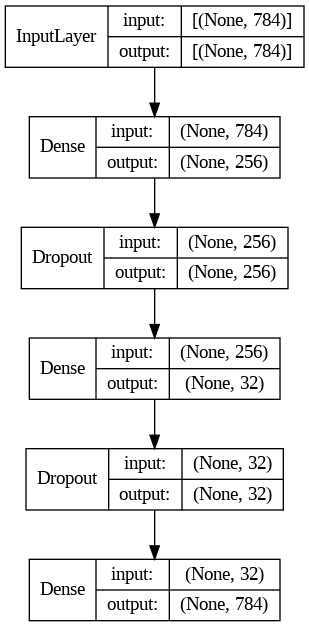

In [ ]:

from keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import SGD, Adam, RMSprop

n=5
optimizer_type = Adam            # optimizador a utilizar para minimizar la función de perdida
loss='binary_crossentropy'       # la función de perdida que el modelo va a intentar minimizar durante el entrenamiento
lr=0.001                         # Tasa de aprendizaje inicial para el optimizador,
epochs=10                        # Numero de epocas durante el entrenamiento del modelo
batch_size=256                   # El batch size es la cantidad de ejemplos que va a utilizar el modelo al tiempo para actualizar los pesos en una sola iteración.
Dropout=0.2                      # Un porcentaje de las neuronas se "apaga" aleatoriamente para evitar el sobreajuste

entrada = keras.Input(shape=(784,))
codificación = layers.Dense(256, activation='relu')(entrada)
dropout_codificación = layers.Dropout(Dropout)(codificación)
codificación2 = layers.Dense(32, activation='relu')(dropout_codificación)
dropout_codificación2 = layers.Dropout(Dropout)(codificación2)
salida = layers.Dense(784, activation='sigmoid')(dropout_codificación2)

autoencoder = keras.Model(entrada, salida)

codificador = keras.Model(entrada, codificación2)
entradacodifi = keras.Input(shape=(32,))
capadescodifi = autoencoder.layers[-1]
descodifi = keras.Model(entradacodifi, capadescodifi(entradacodifi))

keras.utils.plot_model(autoencoder, show_shapes=True, show_layer_names=False)

In [ ]:
optim = optimizer_type(lr=lr)

autoencoder.compile(optimizer=optim, loss=loss)

In [ ]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=epochs,
                batch_size=batch_size,
                shuffle=True,validation_data=(x_test, x_test))

Epoch 1/10
235/235 [==============================] - 5s 18ms/step - loss: 0.2645 - val_loss: 0.1723
Epoch 2/10
235/235 [==============================] - 5s 21ms/step - loss: 0.1787 - val_loss: 0.1486
Epoch 3/10
235/235 [==============================] - 4s 17ms/step - loss: 0.1654 - val_loss: 0.1374
Epoch 4/10
235/235 [==============================] - 4s 17ms/step - loss: 0.1599 - val_loss: 0.1323
Epoch 5/10
235/235 [==============================] - 5s 21ms/step - loss: 0.1570 - val_loss: 0.1295
Epoch 6/10
235/235 [==============================] - 4s 17ms/step - loss: 0.1550 - val_loss: 0.1274
Epoch 7/10
235/235 [==============================] - 4s 17ms/step - loss: 0.1538 - val_loss: 0.1258
Epoch 8/10
235/235 [==============================] - 5s 21ms/step - loss: 0.1524 - val_loss: 0.1245
Epoch 9/10
235/235 [==============================] - 4s 17ms/step - loss: 0.1515 - val_loss: 0.1235
Epoch 10/10
235/235 [==============================] - 4s 17ms/step - loss: 0.1508 - val_lo

In [ ]:
autoencoder.save('modeloinicial.h5')
autoencoder.save_weights('model_pesos.h5')
print(autoencoder.summary())

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_5 (Dense)             (None, 256)               200960    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 32)                8224      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_7 (Dense)             (None, 784)               25872     
                                                                 
Total params: 235056 (918.19 KB)
Trainable params: 235056 (

313/313 [==============================] - 1s 2ms/step


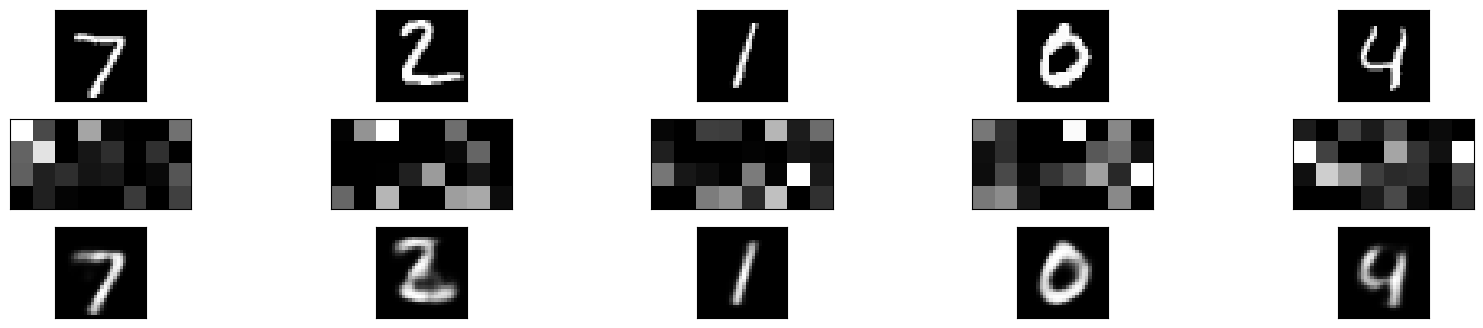

In [ ]:
encoded_imgs = codificador.predict(x_test)
decoded_imgs = descodifi.predict(encoded_imgs)

import matplotlib.pyplot as plt


plt.figure(figsize=(20, 4))
for i in range(n):# recorre en este caso dependiendo del valor de n=4
                  #En este caso i=0,1,2,3
    # Muestras las imagenes originales
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(8, 4).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Muestra las imagenes reconstruidas utilizando el decodificador
    ax = plt.subplot(3, n, i + 1 + n*2)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# **Preguntas orientadoras**
### ***¿Cómo trabaja un autoencoder?***

Son redes neuronales cuyo objetivo es copiar sus entradas en sus salidas, tienen la funcionalidad de comprimir la entrada en una representación de espacio latente y reconstruir la salida a partir de esta representación. Este tipo de red se compone de dos partes:

Encoder:
La parte de la red que comprime la entrada en una representación del espacio latente. Puede representarse mediante una función de codificación h=f(x).
Decoder:
Esta parte tiene como objetivo reconstruir la entrada a partir de la representación del espacio latente. Puede representarse mediante una función de descodificación r=g(h).



### ***¿Cómo se utiliza un autoencoder para la reconstrucción de imágenes con Keras y TensorFlow?***
Para utilizar un autoencoder como reconstrucción de imagenes en Keras y tensor flow se debe tener presente las siguientes indicaciones:

1. Realizar la importación de las bibliotecas de tensorflow y de keras, importantes para el desarrollo del modelo desde sus capas hasta la imagen de salida.
2. Preparar la data, es importante realizar la preparación de los datos antes de cualquier definición a utilizar.
3. Realizar la definición de la arquitectura del autoencoder a utlizar.
4. Definir variables, numeros de capas y realizar una posterior compilación del modelo con cada una de las definiciones establecidas.
5. Realizar entrenamiento del modelo con los datos de entrada preparados.
6. Ejecutar pruebas del autoencoder para reconstrucción de imágenes y de esta forma predecir la imagen de entrada.

# **Prueba 1**

En la prueba #1 se define una capa de entrada de 784 elementos, seguida por una capa densa con 256 neuronas, una capa de dropout con una tasa de 0.2, otra capa densa de 32 neuronas, seguida por otra capa de dropout de tasa 0.2 y finalmente una capa que reconstruye la salida con 784 neuronas.

se utilizan los siguientes valores para cada uno de los parámetros de la red neuronal:

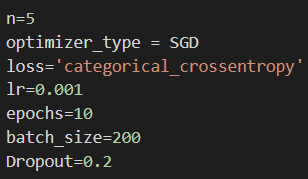

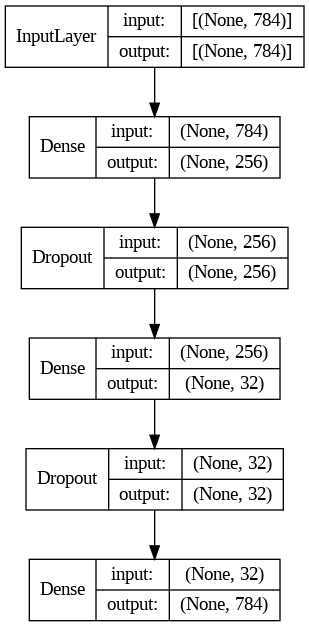

El resultado de entrenar el modelo con los parámetros anteriores indica un problema de entrenamiento ya que se muestra 'nan' como resultado de la perdida y la perdida de validación, probablemente esto es relacionado a la elección del método categorical_cossentropy ya que el autoencoder no está diseñado para clasificación, por el contrario son datos continuos y buscan reconstruir las entradas originales en lugar de clasificarlas.

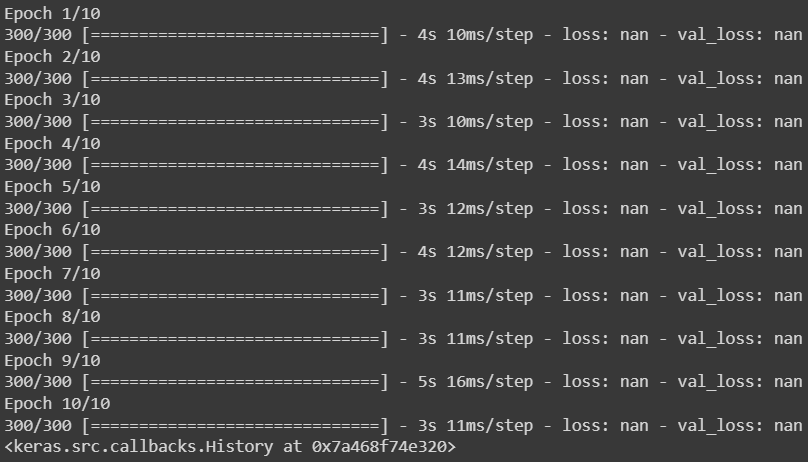

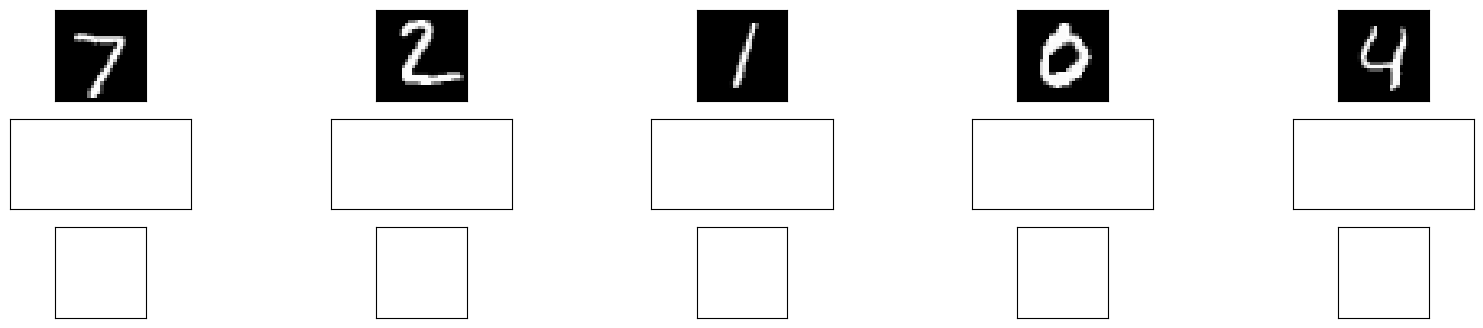

# **Prueba 2**

En la prueba #2 se define una capa de entrada de 784 elementos, seguida por una capa densa con 256 neuronas, una capa de dropout con una tasa de 0.2, otra capa densa de 32 neuronas, seguida por otra capa de dropout de tasa 0.2 y finalmente una capa que reconstruye la salida con 784 neuronas.

se utilizan los siguientes valores para cada uno de los parámetros de la red neuronal:

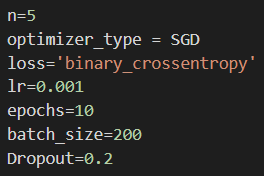

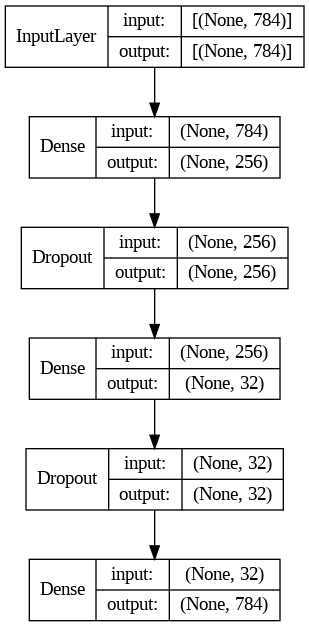

El resultado de entrenar el modelo con los parámetros anteriores indica que los valores de perdida disminuyen de manera constante en cada época, lo cual indica que el modelo está aprendiendo, sin embargo, las imágenes reconstruidas no tiene una estructura visual correcta o reconocible lo que sugiere que el modelo necesita mejorar la calidad de *reconstrucción*

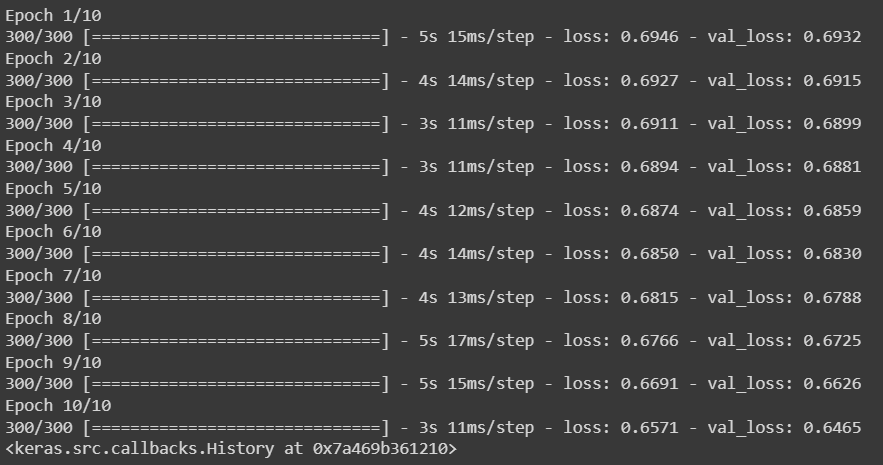

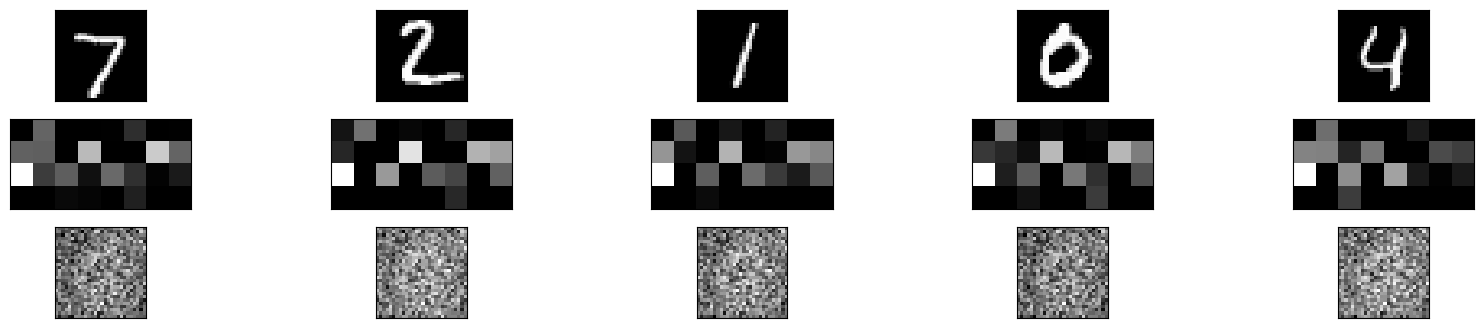

# **Prueba 3**

En la prueba #3 se define una capa de entrada de 784 elementos, seguida por una capa densa con 256 neuronas, una capa de dropout con una tasa de 0.2, otra capa densa de 32 neuronas, seguida por otra capa de dropout de tasa 0.2 y finalmente una capa que reconstruye la salida con 784 neuronas.

se utiliza los siguientes valores para cada uno de los parámetros de la red neuronal:

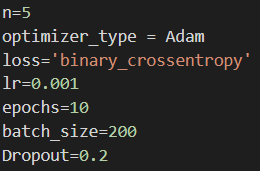

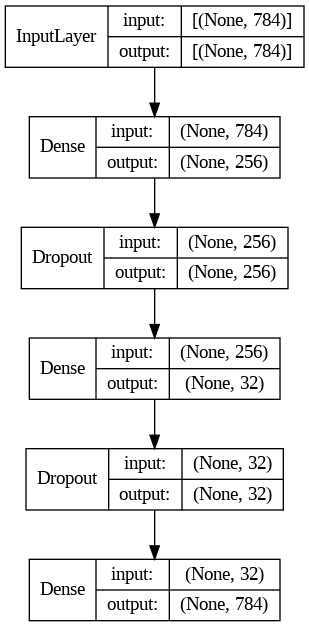

El resultado de entrenar el modelo con los parámetros anteriores indica una disminución constante de los valores de perdida a medida que pasan las épocas, se observa una mejora notable en comparación con las anteriores pruebas. En esta prueba se observa que se realiza la reconstrucción correctamente, sin embargo, es posible realizar una mejora

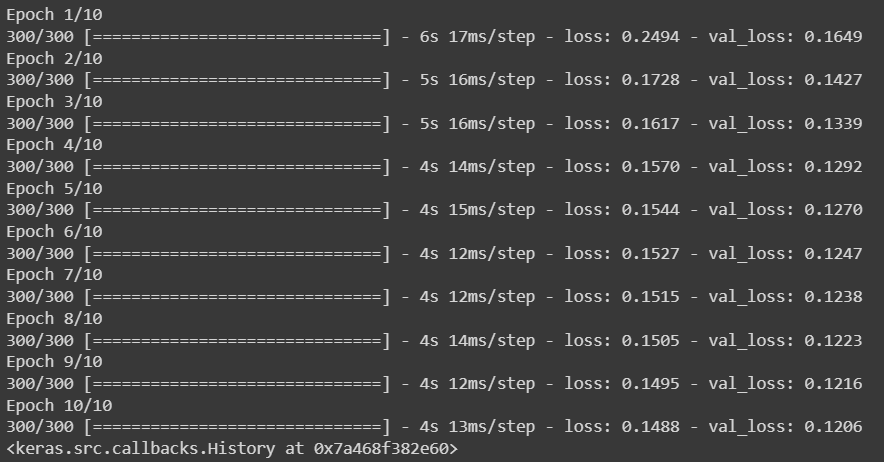

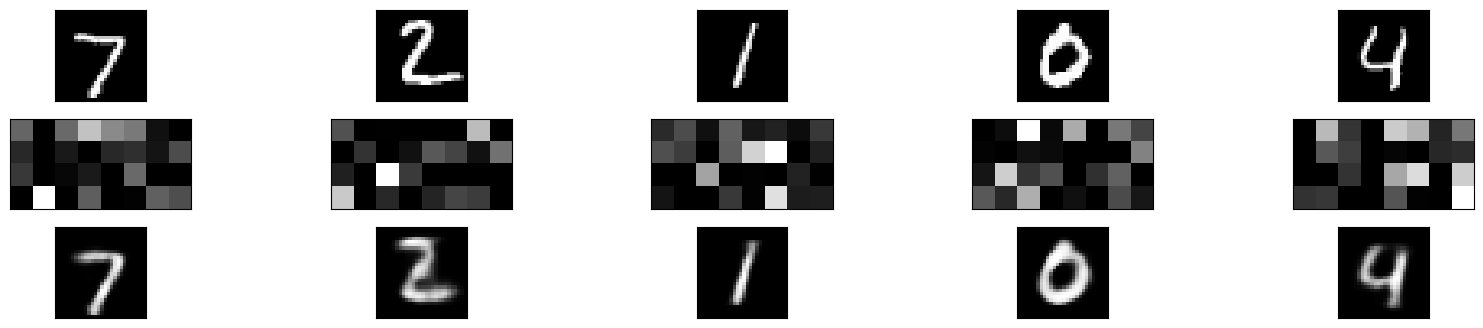

# **Prueba 4**

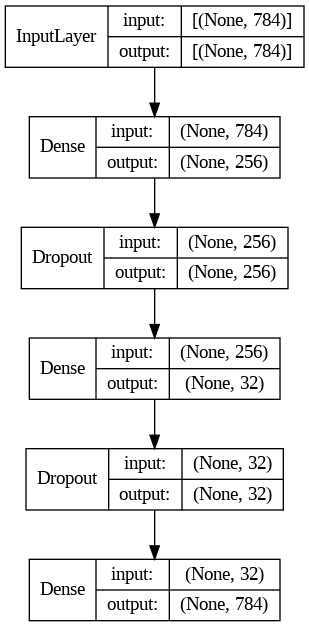

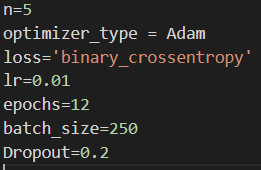

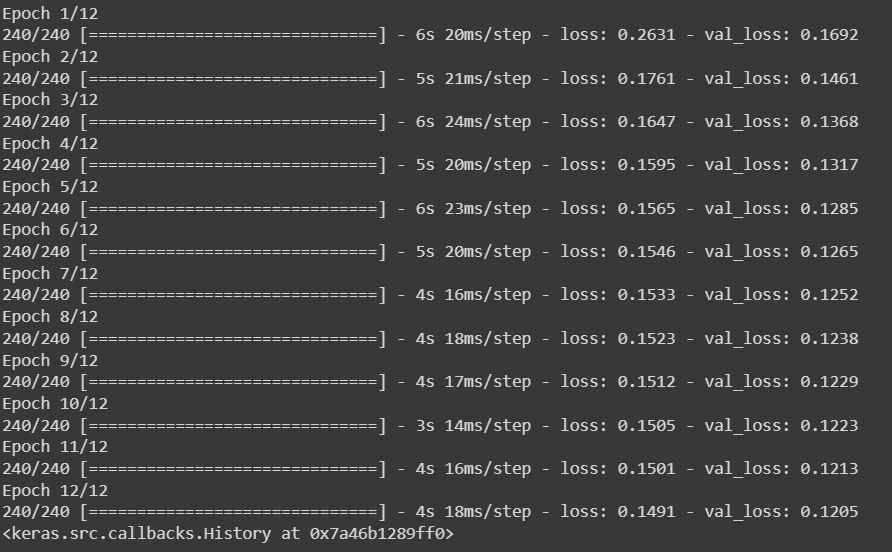

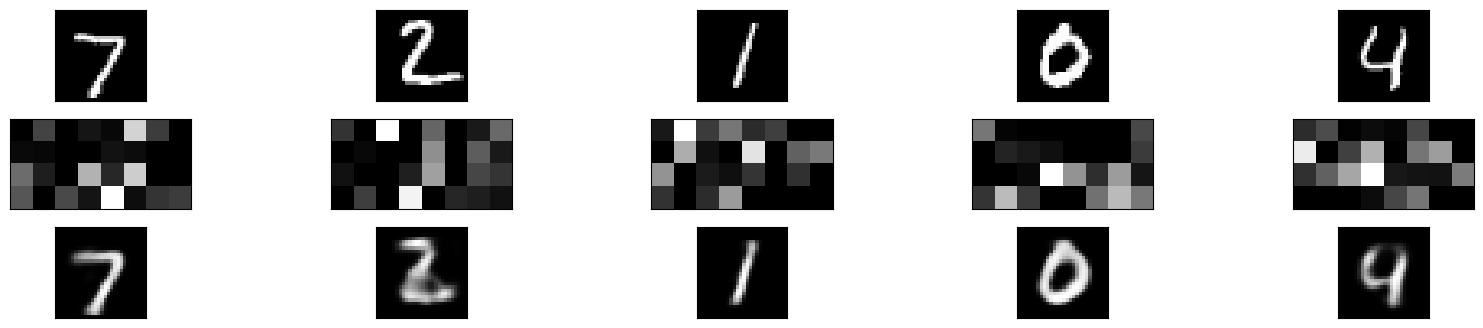

# **Prueba 5**

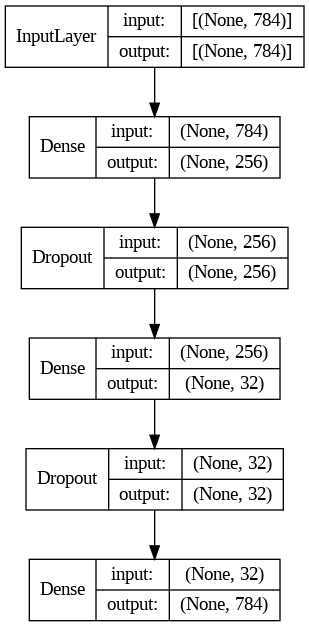

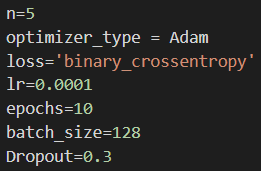

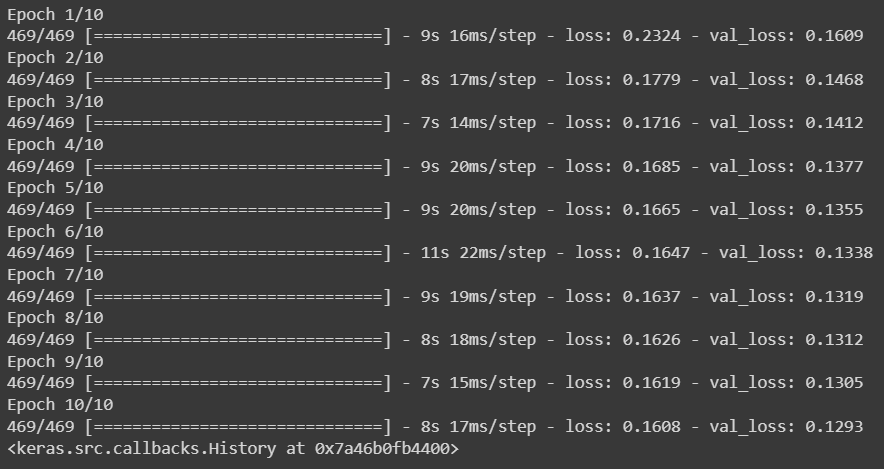

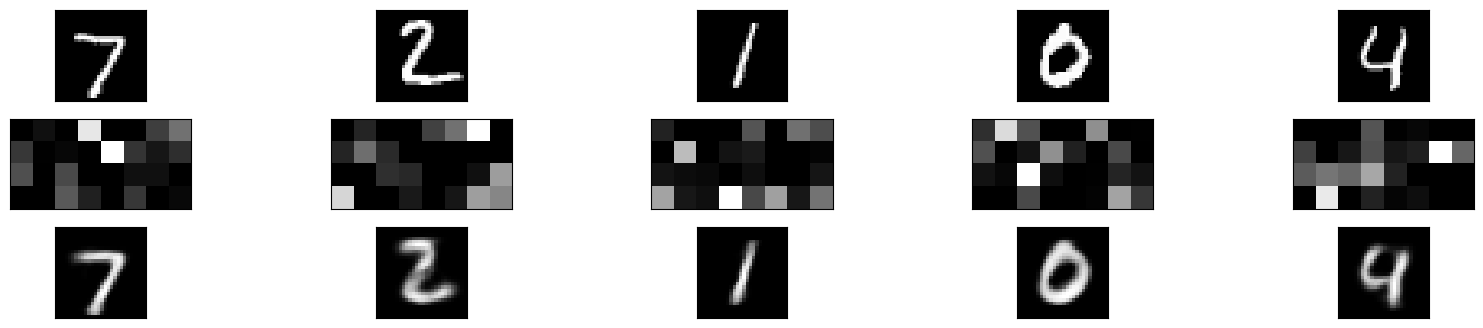

# **Prueba 6**

La prueba #6 fue la que tuvo los mejores resultados con los siguientes valores y adicionando una capa densa con 256 neuronas:

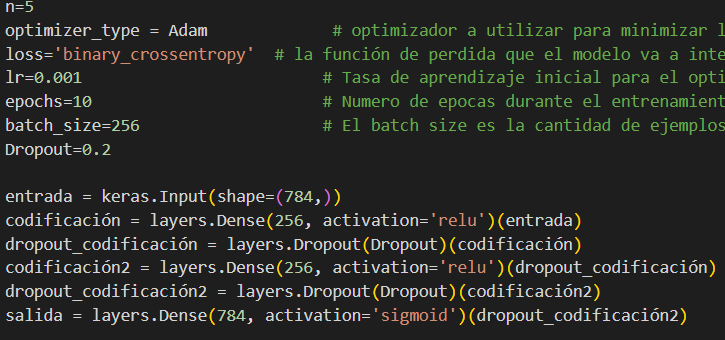

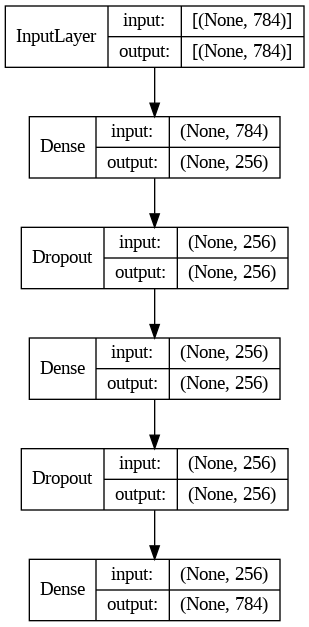

Se puede observar que la prueba# 6 fue la que tuvo los mejores resultados, los valores de perdida se acercaron mas a 0 a medida que pasaban las épocas y la reconstrucción de las imágenes mejoró notablemente en comparación con las pruebas anteriores.


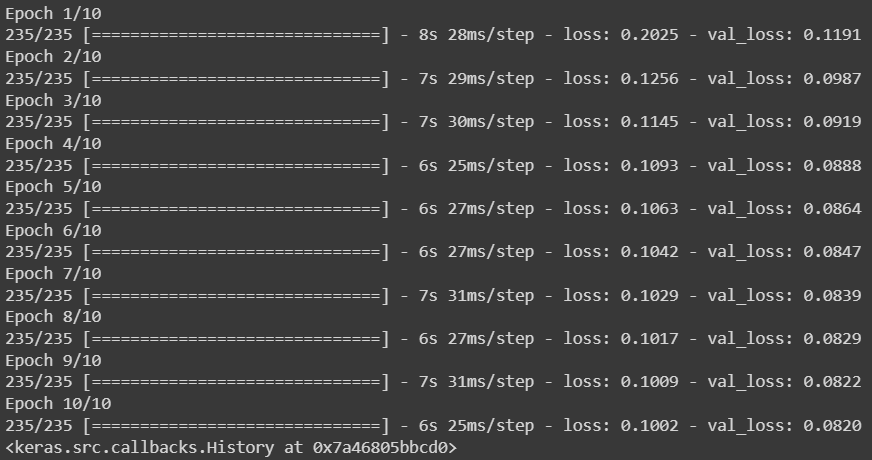

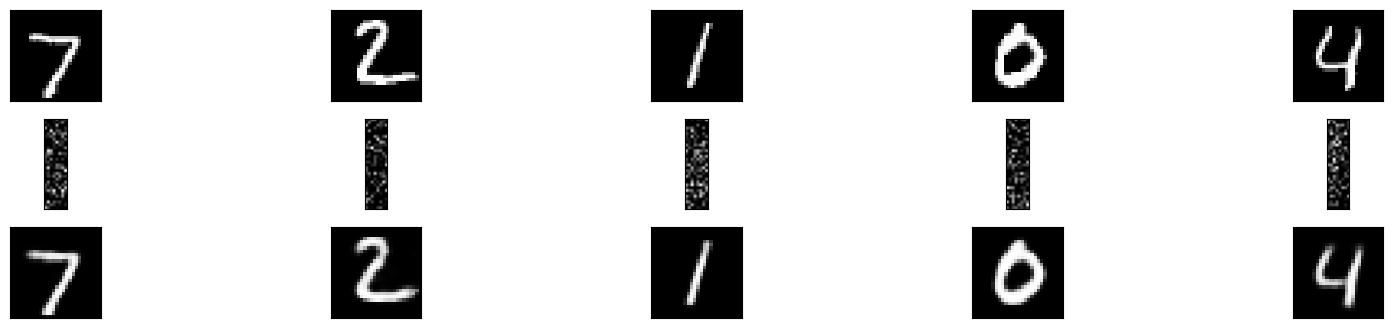

# **Desarrollo**

## **Preparación de los datos**

Se carga el dataset MNIST el cual está compuesto de imágenes ilustradas a mano de dígitos numéricos del 0 al 9.
Se realiza reshape a las imágenes de 28 x 28 píxeles, convirtiéndolos en vectores de 784 elementos, esto con la finalidad de que los datos puedan ser procesados por la red neuronal.

## **Implementación del Autoencoder**

En primera instancia se desarrolla un autoencoder utilizando Keras, se definen primero unas variables las cuales corresponden al tipo de optimizador a utilizar, la función de perdida, la tasa de aprendizaje inicial para el optimizador, el número de épocas durante el entrenamiento del modelo, el Batch Size, el cual corresponde a la cantidad de ejemplos que va a utilizar el modelo al tiempo para actualizar los pesos en una iteración y el valor del Dropout, el cual corresponde al porcentaje de neuronas que serán excluidas de la red neuronal para evitar el sobreajuste.

En primer lugar se establece la capa de entrada del encoder la cual cuenta con un vector de 784 dimensiones, posteriormente se implemento la primera capa de codificación, es una capa densa que reduce la dimensionalidad a 256, se utiliza la función de activación ReLU para añadir no linealidad al sistema, luego se aplica una capa de Dropout donde se apagan aleatoriamente el 20% de las neuronas durante el entrenamiento, posteriormente se añade otra capa, luego se añade otra capa con 32 neuronas y función de activación ReLU, seguida de una capa de dropout de 20%. Luego se encuentra la capa de salida la cual reconstruye la entrada original con una dimensionalidad de 784 y se utiliza una función de activación sigmoide para asegurar que la salida este normalizada. Finalmente se crea el modelo del autoencoder completo y se genera un diagrama del modelo mostrando la forma de los datos en cada capa.

Se realiza la compilación del modelo, y luego se prepara el conjunto de datos MNIST, las imágenes las cuales son almacenadas en matrices de enteros de 28x28 se convierten a tipo flotante y se normalizan dividiéndolas por 255, ya que los valores que pueden tomar los pixeles de una imagen van de 0 a 255 y se cambia este rango a 0-1. Luego las imágenes se redimensionan a vectores de 784 elementos para coincidir con la entrada del encoder. Luego de esto se determino que el conjunto de entrenamiento tiene 60.000 vectores y el conjunto de prueba tiene 10000 vectores.

Luego se inicia el entrenamiento del autoencoder utilizando el conjunto de datos MNIST preparado previamente. La función fit se utiliza para entrenar el modelo con los parámetros especificados de épocas y batch size.

Posteriormente se guarda el modelo completo en un archivo el cual incluye la arquitectura del modelo, los pesos y la configuración del entrenamiento lo cual permite reconstruir el modelo a partir de este archivo, en otro archivo se guardarlos pesos del modelo, y se realiza una visualización del resumen de la arquitectura del modelo, la cual dice que hay una capa de entrada con 784 elementos de entrada, una capa densa con 256 neuronas y 200960 parámetros calculados, luego esta la capa de dropout con una tasa de 0.2, luego otra capa densa con 32 unidades y 8224 parámetros calculados, luego otra capa de dropout con tasa de 0.2 y finalmente la capa densa de saluda con 784 unidades diseñada para reconstruir la imagen de entrada original con 25874 parámetros calculados.

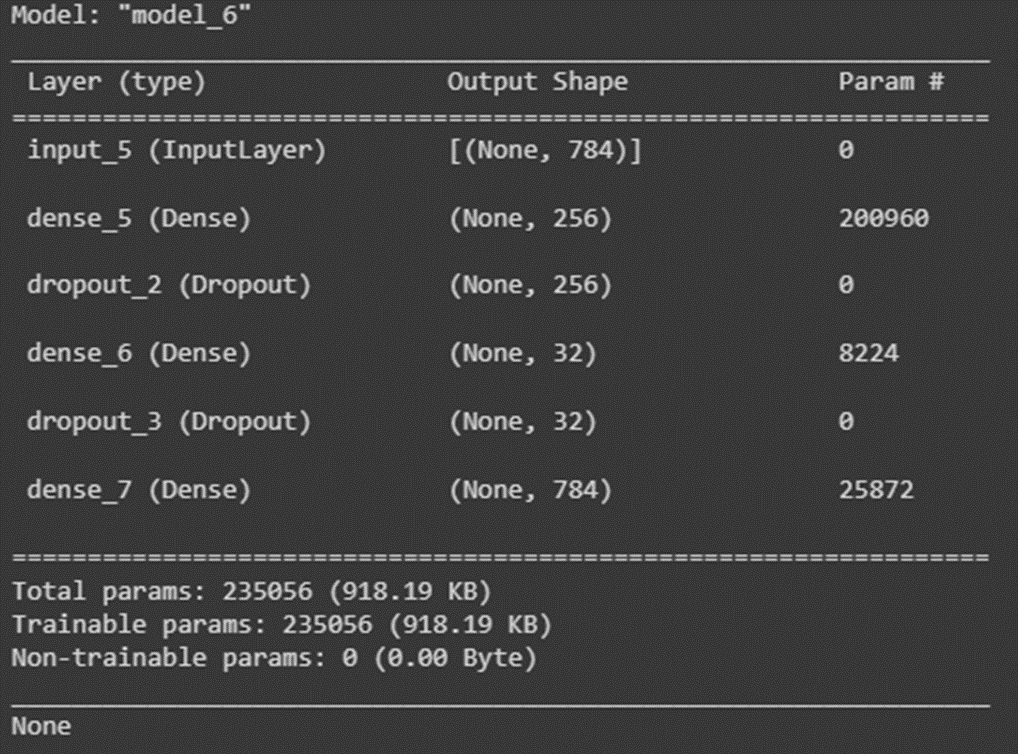

Luego se realiza un código para visualizar las imágenes originales, sus versiones codificadas y las versiones reconstruidas para realizar una comparación, se muestran 5 imágenes en donde se ilustra el proceso de como el autoencoder ha aprendido a capturar las características de las imágenes originales en una forma comprimida y luego como las puede construir a parte de esa comprensión.


# **Conclusiones**

Se implementó un encoder aplicado a un dataset MNIST para la comprensión y reconstrucción de imágenes de dígitos numéricos escritos a mano. Luego de redimensionar las imágenes y normalizarlas se elaboró una red neuronal tipo encoder con Keras.

Se experimentó con diferentes valores de parámetros y se mostró la importancia de la elección del optimizador y la función de perdida adecuados, ya que usando el optimizador SGD y la función de perdida categorical cossentropy dio unos resultados que no cumplieron con las expectativas y no se pudo realizar una reconstrucción de las imágenes de dígitos numéricos. Por otro lado, la adaptación de un optimizador tipo Adam y una función de perdida, “Binary Crossentropy” probó ser efectiva al momento de reconstruir las imágenes, además el sistema mejoró notablemente cuando se adicionó una capa densa con 256 neuronas, los valores de perdida se acercaron cada vez mas a 0 e medida que pasaban las épocas y las imágenes reconstruidas mostraron una gran precisión.

Luego de realizar el entrenamiento del autoencoder, se logró evidenciar imagenes originales, reprecentaciones codificadas e imagenes reconstruidas, con ello se obtiene una forma de evaluar visualmente el rendimeinto del autoencoder y se logra la predecir la muestra reconstruida por el decodificador.




# **Referencias**
- Keras. (2021). Convolutional
- Autoencoder for Image Denoising. Keras.
- Bonaccorso, G. (2018). Mastering Machine Learning Algorithms: Expert Techniques to Implement Popular Machine Learning Algorithms and Fine-Tune your Models
- Torres, J. (2020). Python Deep Learning (1st ed.). Marcombo. https://www.perlego.com/book/2152379/python-deep-learning-introduccin-prctica-con-keras-y-tensorflow-2-pdf
- Zhang, A., Lipton, Z., Li, M., & Smola, A. (2021). Dive into Deep Learning. Recuperado de http://d2l.ai/chapter_multilayer-perceptrons/backprop.html
- Mirjalili, V., & Raschka, S. (2020). Python Machine Learning (1st ed.). Marcombo. Retrieved from https://www.perlego.com/book/2152522/python-machine-learning-pdf (Original work published 2020)
Natanhubens. (2020). Autoencoders Natanhubens.
